In [15]:
# Importando bibliotecas que serão utilizadas no decorrer desse projeto
#As bibliotecas abaixo serão utilizadas para a análise dos dados e plotagem de gráficos
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

#A biblioteca (sklearn) e as funções e classes abaixo serão utilizadas, a fim de criar um modelo de aprendizado de máquina
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

In [16]:
# Aqui foi feita a importação do csv e uma observação em relação ao formato dos dados que serão análisados 
df = pd.read_csv('/Users/Caroline/Documents/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
#Foi verificada a existência de valores nulos e duplicados 
df.info()
df[df.duplicated]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [23]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [24]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [25]:
 features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary', 'IsActiveMember',
             'Geography_Germany', 'Geography_Spain']
X=df[features]
Y=df['Exited']

In [30]:
#Separação de dados para teste e treino 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train[:5], X_test[:5]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  1.36766974,  0.97481699, -0.57946723,
         -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  1.6612541 ,  0.97481699,  1.72572313,
         -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -0.25280688, -1.02583358, -0.57946723,
          1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267,  0.91539272, -1.02583358, -0.57946723,
         -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.05960019, -1.02583358, -0.57946723,
         -0.57638802]]),
 array([[-0.57749609,  0.91324755, -0.6557859 , -0.69539349,  0.32993735,
          0.80843615, -1.54035103, -1.01960511, -1.02583358,  1.72572

In [35]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [36]:
Y_pred = model.predict(X_test)

In [37]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)

In [38]:
print(conf_matrix)
print(class_report)
print(accuracy)

[[1544   63]
 [ 202  191]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

0.8675


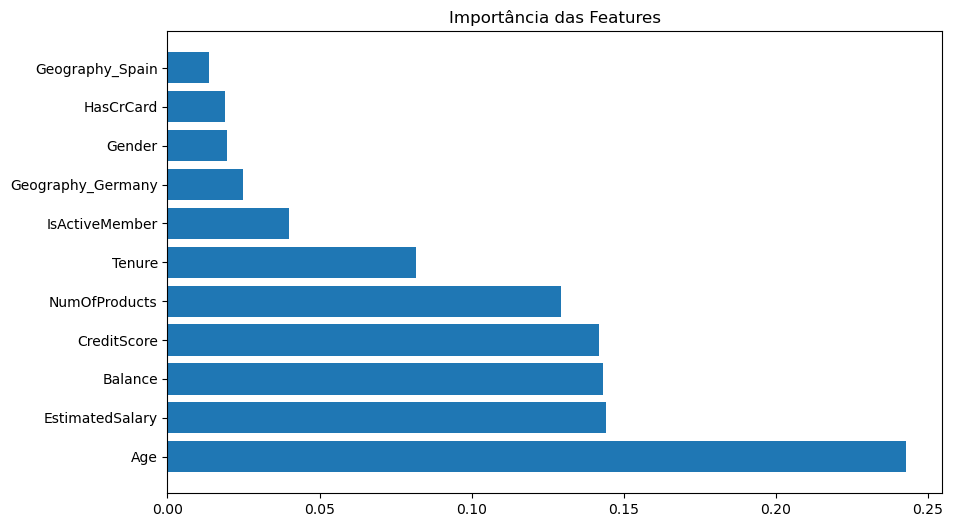

In [41]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features [i] for i in indices]

plt.figure (figsize=(10,6))
plt.title("Importância das Features")
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()

In [47]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Construir e treinar o modelo de Regressão Logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, Y_train)

#Fazer previsões
Y_pred_log_reg = log_reg.predict(X_test)

#Avaliar o modelo
conf_matrix_log_reg = confusion_matrix(Y_test, Y_pred_log_reg)
class_report_log_reg = classification_report(Y_test, Y_pred_log_reg)
accuracy_log_reg = accuracy_score(Y_test, Y_pred_log_reg)

print(conf_matrix_log_reg, class_report_log_reg, accuracy_log_reg)

[[1543   64]
 [ 314   79]]               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000
 0.811


In [52]:
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Construir e treinar o modelo SVM 
svm_model = SVC (kernel='linear', random_state=42)
svm_model.fit(X_train, Y_train)

#Fazer previsões
Y_pred_svm = svm_model.predict(X_test)

#Avaliar o modelo 
conf_matrix_svm = confusion_matrix(Y_test, Y_pred_svm)
class_report_svm = classification_report (Y_test, Y_pred_svm)
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)

print(conf_matrix_svm, class_report_svm, accuracy_svm)

[[1607    0]
 [ 393    0]]               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000
 0.8035


C:\Users\Caroline\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Caroline\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Caroline\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [55]:
from sklearn.neighbors import KNeighborsClassifier

#Construir e treinar o modelo KNN
knn_model = KNeighborsClassifier (n_neighbors=5)
knn_model.fit(X_train, Y_train)

#Fazer previsões 
Y_pred_knn = knn_model.predict(X_test)

#Avaliar o modelo
conf_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
class_report_knn = classification_report(Y_test, Y_pred_knn)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)

print(conf_matrix_knn, class_report_knn, accuracy_knn)

[[1514   93]
 [ 247  146]]               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000
 0.83


In [58]:
from sklearn.ensemble import GradientBoostingClassifier

#Construi e treinar o modelo de Gradient Boosting 
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(X_train, Y_train)

#Fazer previsões 
Y_pred_gbm = gbm_model.predict(X_test)

#Avaliar o modelo 
conf_matrix_gbm = confusion_matrix(Y_test, Y_pred_gbm)
class_report_gbm = classification_report(Y_test, Y_pred_gbm)
accuracy_gbm = accuracy_score(Y_test, Y_pred_gbm)

print(conf_matrix_gbm, class_report_gbm, accuracy_gbm)

[[1543   64]
 [ 201  192]]               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000
 0.8675


In [76]:
df = pd.read_csv('/Users/Caroline/Documents/Churn_Modelling.csv')

# Binary feature for balance 
df ['BalanceZero'] = (df['Balance'] == 0).astype(int)

#Faixas etárias 
df['AgeGroup'] = pd.cut(df ['Age'], bins= [18, 25, 35, 45, 55, 65, 75, 85, 95], labels= ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95'])

#Balance to Salary Ratio
df['BalanceToSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

# Feature de interação entre NumOfProducts e IsActiveMember
df['ProductUsage'] = df['NumOfProducts'] = df['IsActiveMember']

#Tenure grouping
df['TenureGroup'] = pd.cut(df['Tenure'], bins= [0,2,5,7,10], labels= ('0-2', '3-5', '6-7', '8-10'))

In [77]:
label_encoder = LabelEncoder ()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies (df, columns= ['Geography'], drop_first=True)
df['Male_Germany'] = df['Gender'] = df['Geography_Germany']
df['Male_Spain'] = df['Gender'] = df['Geography_Spain']

In [78]:
df = pd.get_dummies (df, columns= ['AgeGroup', 'TenureGroup'], drop_first=True)

In [79]:
features= ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 
           'Geography_Spain', 'BalanceZero', 'BalanceToSalaryRatio', 'ProductUsage', 'Male_Germany', 'Male_Spain'] + [col for col in df.columns if 
               'AgeGroup' in col or 'TenureGroup_' in col]

X = df[features]
Y = df['Exited']

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir e treinar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# Fazer previsões
Y_pred = model.predict(X_test)

In [82]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report (Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)

In [83]:
print(conf_matrix)
print(class_report)
print(accuracy)

[[1529   78]
 [ 251  142]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.65      0.36      0.46       393

    accuracy                           0.84      2000
   macro avg       0.75      0.66      0.68      2000
weighted avg       0.82      0.84      0.82      2000

0.8355
